In [34]:
import numpy as np
from scipy.optimize import minimize,fsolve
import math
import matplotlib.pyplot as plt
from MLE import *
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# Estimacion de Máxima Verosimilitud 

### Distribución Normal

Los [datos](https://seattlecentral.edu/qelp/sets/059/059.html) provienen de un experimento de Mercer and Hall sobre el rendimiento fanegas de trigo por unidad de tierra  Rothamsted Experimental Station en Gran Bretaña. Los datos siguen una distribución normal, por lo que buscamos obtener los estimadores de máxima verosmilitud. 




In [5]:
global data
data=np.loadtxt('wheat_yield.txt')


Text(0.5, 0, 'Fanegas de trigo por unidad')

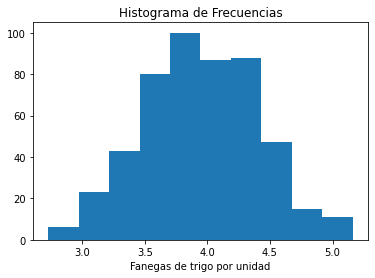

In [6]:
plt.hist(data)
plt.title('Histograma de Frecuencias')
plt.xlabel('Fanegas de trigo por unidad')

In [40]:
def normal_loglikelihood(params,*args):
    mu = params[0]
    sigma = params[1]
    x = data
    n=len(data)
    
    loglikelihood=-(n/2)*np.log(2*np.pi)-(n/2)*np.log(sigma**2)-(1/(2*sigma**2))*np.sum((x-mu)**2)
    
    return -1*loglikelihood


In [52]:
x1_grid=np.linspace(2,6,1000)
x2_grid=np.linspace(.1,1.5,1000)
X1, X2 = np.meshgrid(x1_grid, x2_grid)
positions = np.vstack([X1.ravel(), X2.ravel()]).T
ll_eval=np.array([np.log(normal_loglikelihood(i,data)) for i in positions])

In [54]:
ll_eval=ll_eval.reshape(1000,1000)

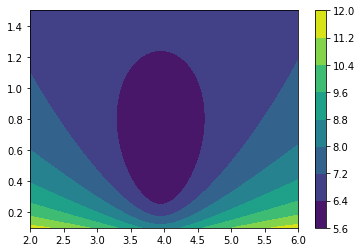

In [55]:
fig,ax=plt.subplots(1,1)
cp = ax.contourf(X1, X2, ll_eval)
fig.colorbar(cp) # Add a colorbar to a plot

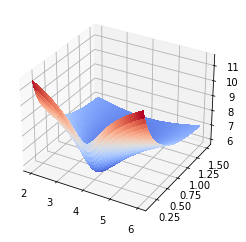

In [56]:

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, ll_eval, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)